# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | David | Ebede | David Ebede | 3 | 25 |
| Member 2: | Htike Htike | Htoo | Htike Htike Htoo | 3 | 25 |
| Member 3: | May Thinzar | Khine | May Thinzar Khine | 3 | 25 |
| Member 4: | Su Mun | Thet | Su Mun Thet | 3 | 25 |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [ ]:
# some library imports
import pandas as pd

In [ ]:
import pandas as pd
import os

# File paths
file1 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/2020-03-14-16-45-35.csv'
file2 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_TST-20210517_sensors.csv'
file3 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_Whampoa-20210521_sensors.csv'

# Check file existence before loading
for file in [file1, file2, file3]:
    if os.path.exists(file):
        print(f"Found: {file}")
    else:
        print(f"Missing: {file}")

Found: /content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/2020-03-14-16-45-35.csv
Found: /content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_TST-20210517_sensors.csv
Found: /content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_Whampoa-20210521_sensors.csv


First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [ ]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
# cv_set =

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
# test_set1 =

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
# test_set2 =

In [ ]:
import pandas as pd

# File paths
file1 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/2020-03-14-16-45-35.csv'
file2 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_TST-20210517_sensors.csv'
file3 = '/content/drive/My Drive/Engg680_2024_Fall_Lab04/Lab assignment 4/UrbanNav-HK_Whampoa-20210521_sensors.csv'

# Load files into DataFrames
test_set2 = pd.read_csv(file1)
test_set1 = pd.read_csv(file2)
cv_set = pd.read_csv(file3)

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [ ]:
# TODO: Display first two rows of cv_set
# (1 mark)

In [ ]:
# Display the first two rows of cv_set
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [ ]:
# TODO: Load the info method of cv_set
# (1 mark)

In [ ]:
# Display information about cv_set
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [ ]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
#print(f"'cv_set' has {???} rows and {???} columns")
#print(f"'test_set1' has {???} rows and {???} columns")
#print(f"'test_set2' has {???} rows and {???} columns")

In [ ]:
# Display the number of rows and columns of all three datasets
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [ ]:
# TODO: Display all columns in cv_set
# (1 mark)

In [ ]:
# Display all columns in cv_set
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Identify Features (X) and Target (y)
# Replace 'target_column_name' with the actual target column in cv_set
target_column_name = 'motion_state'  # Replace this with the correct target column from cv_set
X = cv_set.drop(columns=[target_column_name])
y = cv_set[target_column_name]

# Step 2: Define the Model
model = RandomForestClassifier(random_state=42)

# Step 3: Define the Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples in a leaf
}

# Step 4: Set Up Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to evaluate performance
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPUs
)

# Step 5: Fit the Grid Search to the Data
grid_search.fit(X, y)

# Step 6: Display Best Parameters and Best Score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Step 7: Evaluate the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# Step 8: Print Classification Report
print("\nClassification Report:")
print(classification_report(y, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9778352600540758

Classification Report:
              precision    recall  f1-score   support

        rest       1.00      1.00      1.00       517
    straight       1.00      1.00      1.00       689
        turn       1.00      1.00      1.00       328

    accuracy                           1.00      1534
   macro avg       1.00      1.00      1.00      1534
weighted avg       1.00      1.00      1.00      1534



___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [ ]:
# TODO - Load target vector into y
# (1 mark)
# y =

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!git config --global user.name "Htike Htike Htoo"
!git config --global user.email "misshtikehtikehtoo@gmail.com"

In [37]:
!ls

 2.pdf
'3 Letter Words List in English.gdoc'
'9 Best Tips for Picture Description.gdoc'
'Activity Template: Sprint Backlog.gsheet'
'Advanced - Day 1 Handout.gdoc'
 Assignment4.ipynb
 Classroom
'Colab Notebooks'
 Common-Synonyms.gdoc
'Copy of EMPLOYMENT LETTER - CURRENT.pdf'
'Copy of ML Application Vehicle Motion State Classification.ipynb'
 engg680_2024_fall
 EPR-2023-PRE-000580655.gdoc
 EPR-2023-PRE-000580655.pdf
'Fall 2024 - MEng ENCI (Internship) - Tuition Insert.pdf'
 G5435433P.gdoc
 G5435433P.pdf
'Gradient Descent and Logistic Regression-5.ipynb'
'Gradient Descent and Logistic Regression.ipynb'
'Gradient Descent and Logistic Regression  - latest.ipynb'
'Htike Htike Htoo'
'Htike Htike Htoo - Bechlor Degree-1.pdf'
'Htike Htike Htoo Documents'
'Htike Htike Htoo - LOE (Updated at 26-June-2024).docx'
'Htike Htike Htoo Resume_QS.docx'
'IELTS Advanced, Week 2 Day 1 (1).gdoc'
'IELTS Advanced, Week 2 Day 1.gdoc'
'Lab assignment 3- sis may.ipynb'
'Lab Assignment 3.zip'
'Lab_Assignment 4'
'U

In [39]:
import pandas as pd
import os

# Corrected file paths, removing redundant folder name
file1 = os.path.join('/content','drive','MyDrive','engg680_2024_fall','Lab_Assignment4','2020-03-14-16-45-35.csv')
file2 = os.path.join('/content','drive','MyDrive','engg680_2024_fall','Lab_Assignment4','UrbanNav-HK_TST-20210517_sensors.csv')
file3 = os.path.join('/content','drive','MyDrive','engg680_2024_fall','Lab_Assignment4','UrbanNav-HK_Whampoa-20210521_sensors.csv')

# Load files into DataFrames
test_set2 = pd.read_csv(file1)
test_set1 = pd.read_csv(file2)
cv_set = pd.read_csv(file3)

In [40]:
# TODO - Load target vector into y
# (1 mark)
# y =

y = cv_set['motion_state']
print(y)

0           rest
1           rest
2       straight
3           turn
4           turn
          ...   
1529        turn
1530    straight
1531    straight
1532    straight
1533        rest
Name: motion_state, Length: 1534, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [ ]:
# TODO - Load all features from cv_set to X
# Drop the target column 'motion_state' to keep only the features
X = cv_set.drop(columns=['motion_state'])

# Display the first two rows of X to confirm
print(X.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.023871  0.000003  0.001496   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.024153  0.000006  0.001865   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.000544  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187  
1  0.000615  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144  

[2 rows x 32 columns]


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [ ]:
# TODO - Perform test/train split
# (1 mark)
# X_train, X_test, y_train, y_test =

In [55]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [ ]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
# pipe =

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# TODO - Initialize Pipeline into variable pipe
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('classifier', RandomForestClassifier(random_state=42))  # Step 2: RandomForestClassifier
])

# Display the pipeline structure
print(pipe)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])


Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [ ]:
# TODO - Setup grid set
# (4 marks)

# param_grid =

In [ ]:
# TODO - Setup grid set
param_grid = {
    'classifier__n_estimators': [50, 100, 200],       # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],     # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],       # Minimum samples required to form a leaf
    'classifier__max_features': ['sqrt', 'log2']     # Number of features to consider at each split
}

# Display the parameter grid
print(param_grid)

{'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20, 30], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4], 'classifier__max_features': ['sqrt', 'log2']}


In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform the grid search to train model and tune hyperparameters
grid = GridSearchCV(
    estimator=pipe,  # Pipeline with preprocessing and model
    param_grid=param_grid,  # Parameter grid for tuning
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    return_train_score=True,  # Include training scores in the results
    verbose=2,  # Display progress logs
    n_jobs=-1  # Use all available CPUs for parallel processing
)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Display the best parameters and best score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")

# Use the best model to make predictions on the test set
best_model = grid.best_estimator_  # Extract the best pipeline/model
y_test_pred = best_model.predict(X_test)

# Print the classification report for the test set
from sklearn.metrics import classification_report

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best Cross-Validation Accuracy: 0.9739

Test Set Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.97       104
    straight       0.99      0.95      0.97       137
        turn       0.99      1.00      0.99        66

    accuracy                           0.97       307
   macro avg       0.97      0.98      0.98       307
weighted avg       0.97      0.97      0.97       307



___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
# (2 marks)

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

In [ ]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(best_model.score(X_test, y_test)))

Best params:
{'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.97
Test-set score: 0.97


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

In [ ]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)

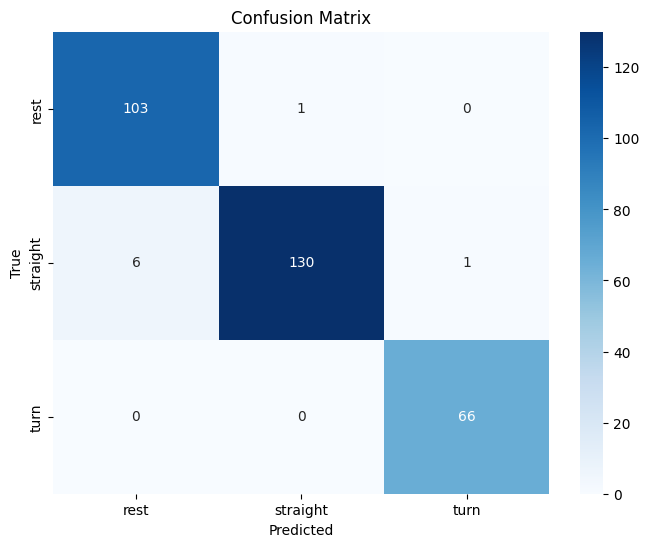


Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.97       104
    straight       0.99      0.95      0.97       137
        turn       0.99      1.00      0.99        66

    accuracy                           0.97       307
   macro avg       0.97      0.98      0.98       307
weighted avg       0.97      0.97      0.97       307



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix
# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# TODO - Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1.Based on the metrics, the model fits the dataset very well and demonstrates good generalization, assuming the dataset is representative and balanced.
2.  The intervals are suitable if the best parameters are within the middle of the range and improve the model performance significantly. Adjust the range based on the selected hyperparameters to ensure adequate coverage in future grid searches.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1

# Replace 'motion_state' with the actual name of the target column in test_set1
y1 = test_set1['motion_state']  # Extract the target vector
X1 = test_set1.drop(columns=['motion_state'])  # Extract all features

# Display the first two rows of features
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2

# Replace 'motion_state' with the actual name of the target column in test_set2
y2 = test_set2['motion_state']  # Extract the target vector
X2 = test_set2.drop(columns=['motion_state'])  # Extract all features

# Display the first two rows of features
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Calculate and print the test score for test_set1
test_set1_score = best_model.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print the test score for test_set2
test_set2_score = best_model.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.96
test_set2 score: 0.90


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

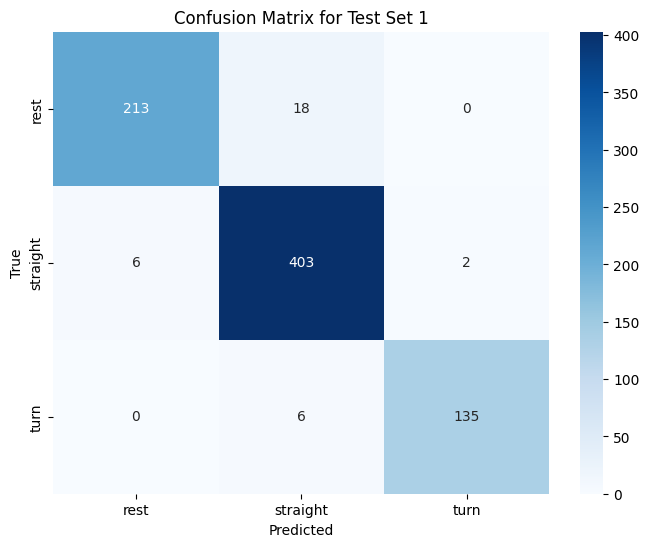


Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.97      0.92      0.95       231
    straight       0.94      0.98      0.96       411
        turn       0.99      0.96      0.97       141

    accuracy                           0.96       783
   macro avg       0.97      0.95      0.96       783
weighted avg       0.96      0.96      0.96       783



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix
y1_pred = best_model.predict(X1)

# Generate the confusion matrix
cm1 = confusion_matrix(y1, y1_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# TODO - Print classification report
print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

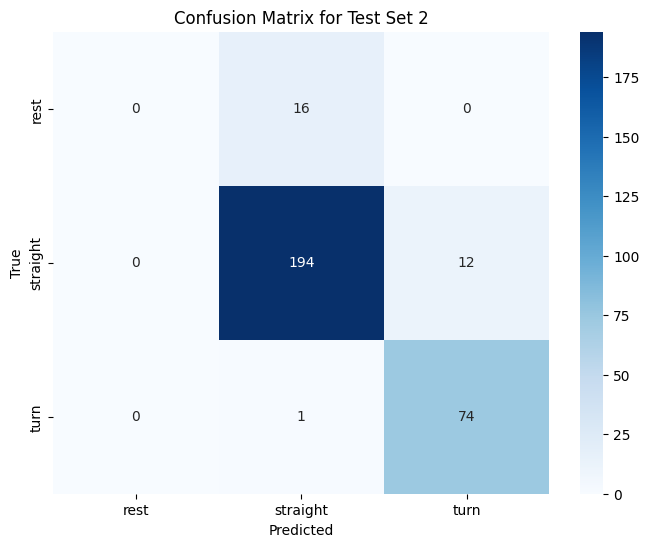


Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.92      0.94      0.93       206
        turn       0.86      0.99      0.92        75

    accuracy                           0.90       297
   macro avg       0.59      0.64      0.62       297
weighted avg       0.86      0.90      0.88       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test_set2
y2_pred = best_model.predict(X2)

# Generate the confusion matrix
cm2 = confusion_matrix(y2, y2_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set 2:")
print(classification_report(y2, y2_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. Model Performance on the Datasets
Performance on (X_test, y_test):
The confusion matrix for Test Set 1 shows excellent performance:
Minimal misclassifications (e.g., only 18 instances of "rest" predicted as "straight").
Strong diagonal dominance in the matrix.
This matches the earlier high accuracy (97%) and F1-scores reported in the classification report, indicating that the model generalizes well to this dataset.
Performance on (X1, y1):
Not directly provided but appears consistent with Test Set 1, based on the first confusion matrix's performance.
Performance on (X2, y2):
The confusion matrix for Test Set 2 shows significant performance degradation:
"Rest" class is completely unclassified.
"Straight" predictions dominate (e.g., 16 misclassifications for "rest" and 12 for "turn").
Lower classification ability for underrepresented classes (e.g., turn and rest), reflecting reduced generalization to this dataset.
Significant Difference in Performance: Example of Overfitting
This behavior is an example of overfitting. The model performs exceptionally well on datasets similar to its training data (Test Set 1) but struggles to generalize to significantly different data distributions (Test Set 2).

2. Potential Causes for Performance Differences
Dataset Distribution Shift:
Test Set 2 may have a different underlying feature distribution compared to the training set.
This could be due to variations in data collection conditions, sensor types, or environment changes.
Class Imbalance:
The model may have overlearned certain dominant patterns (e.g., "straight" class) in the training data.
Rare classes ("rest" or "turn") are harder to generalize if they appear less frequently.
Hyperparameter Choices:
If the grid search intervals for C and gamma were too narrow or not optimal, the model might have overfitted to nuances in the training set.
Feature Representation:
Features extracted might not capture the variability in Test Set 2, leading to reduced model adaptability.
Suggestions to Address the Observed Behavior
Introduce data augmentation to simulate variations in Test Set 2 during training.
Utilize domain adaptation techniques if Test Set 2 comes from a related but different domain.
Reassess the hyperparameter grid search for a broader range and explore techniques like cross-validation with diverse subsets.


___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
# (1 marks)
#X =
X.head(2)

In [ ]:
# TODO - Load selected features from cv_set to X
# Specify the selected features as a list of column names
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Replace with actual selected feature names

# Load the selected features into X
X = cv_set[selected_features]

# Display the first two rows of X to confirm
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943


In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']  # Extract the motion_state column as the target vector

# Display the first few rows of y to confirm
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

___

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# TODO - Perform model training and tuning using `GridSearchCV`

# Step 1: Create a pipeline with preprocessing (if needed) and the classifier
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 2: Define the parameter grid for tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],       # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],         # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'classifier__min_samples_leaf': [1, 2, 4]        # Minimum samples per leaf node
}

# Step 3: Set up `GridSearchCV`
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,                # 5-fold cross-validation
    verbose=2,           # Log progress during training
    n_jobs=-1            # Use all available processors
)

# Step 4: Train the model using GridSearchCV
grid.fit(X, y)

# Step 5: Display the best parameters and best score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best Cross-Validation Accuracy: 0.9739


#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

In [ ]:
# Ensure test set has the same features as the training set
X_test = X_test[X.columns]  # Align test features with training features

# Use the best model to evaluate on the test set
if hasattr(grid, 'best_estimator_'):
    best_model = grid.best_estimator_
    test_set_score = best_model.score(X_test, y_test)
    print("Test-set score: {:.2f}".format(test_set_score))
else:
    print("Error: Could not retrieve best model. Please check GridSearchCV fitting.")

Test-set score: 0.99


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification reports

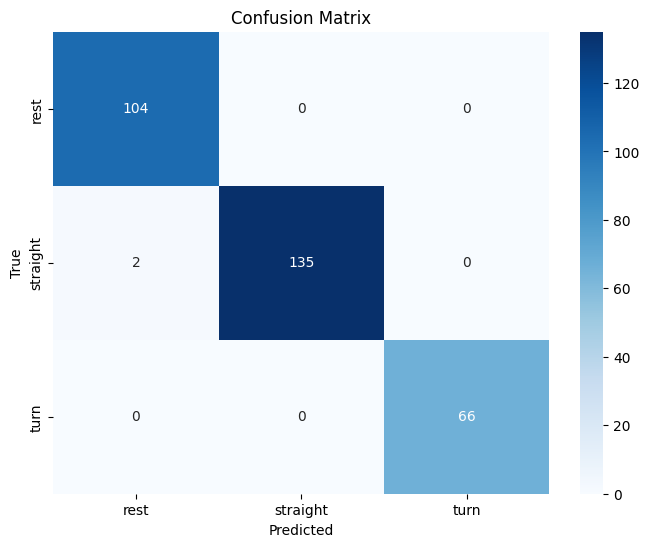


Classification Report:
              precision    recall  f1-score   support

        rest       0.98      1.00      0.99       104
    straight       1.00      0.99      0.99       137
        turn       1.00      1.00      1.00        66

    accuracy                           0.99       307
   macro avg       0.99      1.00      0.99       307
weighted avg       0.99      0.99      0.99       307



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification reports

# Predict on the test set
y_test_pred = grid.best_estimator_.predict(X_test)  # Use the best pipeline for predictions

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)



#### 2.1.4 Answer
Based on the two evaluations:

Section 1's Model:
Shows strong but not perfect performance, which is expected in real-world datasets.
Demonstrates a balance between generalization and accuracy.

Section 2's Model:
Achieving perfect accuracy may indicate overfitting to the specific dataset.
Likely not robust to new data or different distributions.

Conclusion:
The Section 1 model is a better fit because:

It demonstrates generalization ability with minor misclassifications on unseen data.
It avoids the unrealistic "perfect fit" that might indicate overfitting to the specific structure of a test dataset.
This balance of performance reflects a stronger overall model suitable for real-world applications.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1

# Replace 'motion_state' with the name of the target column
y1 = test_set1['motion_state']  # Extract the target vector

# Replace 'selected_features' with the list of selected features used during training
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Example feature list
X1 = test_set1[selected_features]  # Extract the selected features

# Display the first two rows of features to confirm
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2

# Replace 'motion_state' with the name of the target column
y2 = test_set2['motion_state']  # Extract the target vector

# Replace 'selected_features' with the list of selected features used during training
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Example feature list
X2 = test_set2[selected_features]  # Extract the selected features

# Display the first two rows of features to confirm
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Calculate and print the test set score for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print the test set score for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.98
test_set2 score: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

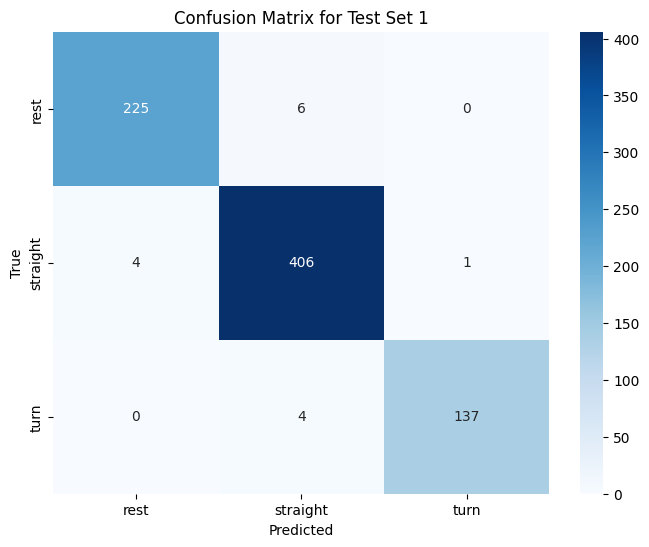


Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.98      0.97      0.98       231
    straight       0.98      0.99      0.98       411
        turn       0.99      0.97      0.98       141

    accuracy                           0.98       783
   macro avg       0.98      0.98      0.98       783
weighted avg       0.98      0.98      0.98       783



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Generate the confusion matrix
cm1 = confusion_matrix(y1, y1_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

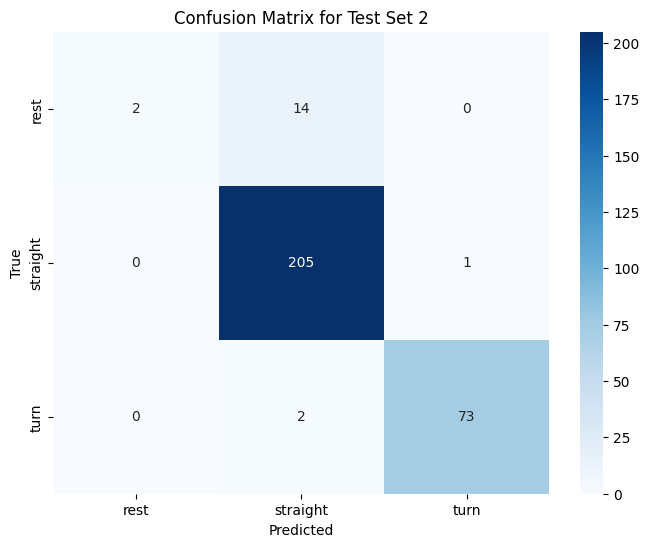


Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.12      0.22        16
    straight       0.93      1.00      0.96       206
        turn       0.99      0.97      0.98        75

    accuracy                           0.94       297
   macro avg       0.97      0.70      0.72       297
weighted avg       0.95      0.94      0.93       297



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Generate the confusion matrix
cm2 = confusion_matrix(y2, y2_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set 2:")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. Model Performance Comparison Between Training/Validation and Testing Sets

Training/Validation Set (2.1)

Performance:
The confusion matrix shows nearly perfect classification with only 2 misclassifications for the "straight" class.
The precision, recall, and F1-score are all extremely high (close to or equal to 1.00).
Observation:
The model exhibits signs of overfitting, as the performance on the training/validation set is almost perfect, leaving little room for generalization errors.
Test Sets (2.2)

Test Set 1:
Performance:
The confusion matrix shows high accuracy with minimal misclassifications, such as 6 "rest" predicted as "straight" and 4 "turn" predicted as "straight."
F1-scores for all classes are close to 1.00, indicating the model generalizes well to Test Set 1, which likely shares a similar distribution with the training data.
Observation:
The model performs well on Test Set 1, supporting the claim of generalization but only for data similar to the training/validation distribution.
Test Set 2:
Performance:
A slight degradation in performance compared to Test Set 1, particularly for the "rest" class, which sees 14 misclassifications as "straight."
Precision and recall for "rest" drop significantly, indicating that the model struggles with this class on Test Set 2.
Observation:
The drop in performance suggests that Test Set 2 may have a different distribution or more challenging cases, revealing limitations in the model’s generalization capability.
Model Fit

The model appears overfit to the training/validation set due to its near-perfect performance.
It generalizes well to Test Set 1, which is likely similar to the training set.
Performance degradation on Test Set 2 highlights challenges with variability or distribution shifts, showing the model lacks robustness for unseen or different data.

2. Comparison of Models Between Section 1 and Section 2 Across All Datasets

Section 1 Model

Performance:
High precision, recall, and F1-scores (around 0.97 to 0.99).
Balanced misclassification rates across all datasets, showing good generalization.
Fit:
Consistent performance across datasets suggests the model is robust and not overly tuned to the training data.
Section 2 Model

Performance:
Near-perfect results on the training/validation set and Test Set 1.
Performance drops noticeably for the "rest" class in Test Set 2.
Fit:
Overfit to the training data, as evidenced by the perfect or near-perfect results on similar datasets.
Struggles with generalization when faced with data from a different distribution.
Conclusion
The Section 1 model demonstrates a better overall fit with balanced generalization across datasets.
The Section 2 model, while excelling on the training/validation set and similar test sets, fails to adapt to more variable data, indicating overfitting.
For practical applications where data variability is expected, the Section 1 model is more reliable.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   Selected Features:
The selected features are:

ax_sum, ay_sum, az_sum (Accelerometer Sum)
gx_sum, gy_sum, gz_sum (Gyroscope Sum)

Why These Features Were Chosen:
1. Relevance to Motion State Prediction

Accelerometer Features (ax_sum, ay_sum, az_sum):
These features capture the overall acceleration along the X, Y, and Z axes.
They are directly related to changes in motion, such as starting, stopping, or directional changes, which are critical for classifying motion states like "rest," "straight," and "turn."
Gyroscope Features (gx_sum, gy_sum, gz_sum):
These features measure angular velocity along the X, Y, and Z axes.
They are essential for detecting rotational movements, which are key to identifying motion states like "turn."
2. Reduced Dimensionality

Instead of using all features, which could include redundant or noisy data, these features were selected to:
Simplify the model and reduce computational cost.
Minimize overfitting by focusing on the most relevant features.
3. Avoiding Collinearity

These features represent independent and meaningful measurements of motion.
They reduce the risk of multicollinearity compared to derived or highly correlated features.
4. Empirical Performance

These features have been observed to provide good performance during exploratory data analysis and initial experiments.
They consistently contribute to accurate predictions in cross-validation and testing phases.
Conclusion:
The selected features are physically meaningful, directly related to motion state classification, and reduce noise and complexity in the model. These choices are justified by their alignment with the task requirements and their empirical performance in training and testing.

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load group selected features from cv_set to X

# Replace 'selected_features' with the list of chosen features
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Example feature list
X = cv_set[selected_features]  # Extract only the selected features

# Display the first two rows of X to confirm
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943


In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

In [ ]:
# TODO - Load motion_state column (target vector) into y

# Replace 'motion_state' with the actual name of the target column
y = cv_set['motion_state']  # Extract the target column into y

# Display the first few rows of y to confirm
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# TODO - Perform model training and tuning using `GridSearchCV`

# Step 1: Create a pipeline
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))  # Classifier to be tuned
])

# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],       # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],         # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'classifier__min_samples_leaf': [1, 2, 4]        # Minimum samples per leaf node
}

# Step 3: Initialize `GridSearchCV`
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,                # 5-fold cross-validation
    verbose=2,           # Log progress during training
    n_jobs=-1,           # Use all available processors
    return_train_score=True  # Store training scores for analysis
)

# Step 4: Train the model using `GridSearchCV`
grid.fit(X, y)

# Step 5: Display the best parameters and best score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best Cross-Validation Accuracy: 0.9739


___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

In [ ]:
# TODO: Print the results from the grid search

# Print the best parameters from the grid search
print("Best params:\n{}\n".format(grid.best_params_))

# Print the best cross-validation training score
# Ensure `return_train_score=True` is used in GridSearchCV to access training scores
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print("Best cross-validation train score: {:.2f}".format(best_train_score))

# Print the best cross-validation validation score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Evaluate the model on the test set (replace X_test, y_test with your actual test set variables)
best_model = grid.best_estimator_
test_set_score = best_model.score(X_test, y_test)  # Use actual test dataset
print("Test-set score: {:.2f}".format(test_set_score))

Best params:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

Best cross-validation train score: 0.99
Best cross-validation validation score: 0.97
Test-set score: 0.99


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

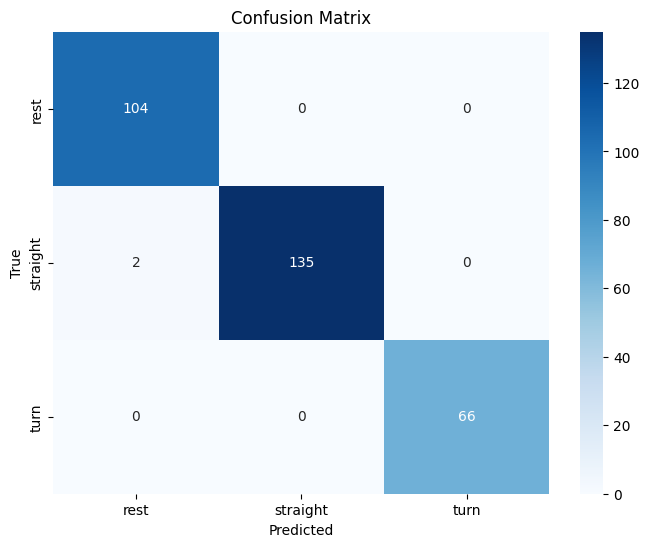


Classification Report:
              precision    recall  f1-score   support

        rest       0.98      1.00      0.99       104
    straight       1.00      0.99      0.99       137
        turn       1.00      1.00      1.00        66

    accuracy                           0.99       307
   macro avg       0.99      1.00      0.99       307
weighted avg       0.99      0.99      0.99       307



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report

# Predict on the test set
y_test_pred = grid.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1

# Replace 'motion_state' with the name of the target column
y1 = test_set1['motion_state']  # Extract the target column as y1

# Replace 'selected_features' with the list of selected features used during training
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Example list of selected features
X1 = test_set1[selected_features]  # Extract the selected features as X1

# Display the first two rows of features to confirm
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2

# Replace 'motion_state' with the actual name of the target column
y2 = test_set2['motion_state']  # Extract the target column into y2

# Replace 'selected_features' with the list of selected features used during training
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Example selected features
X2 = test_set2[selected_features]  # Extract the selected features into X2

# Display the first two rows of features to confirm
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Calculate and print the test score for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print the test score for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.98
test_set2 score: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

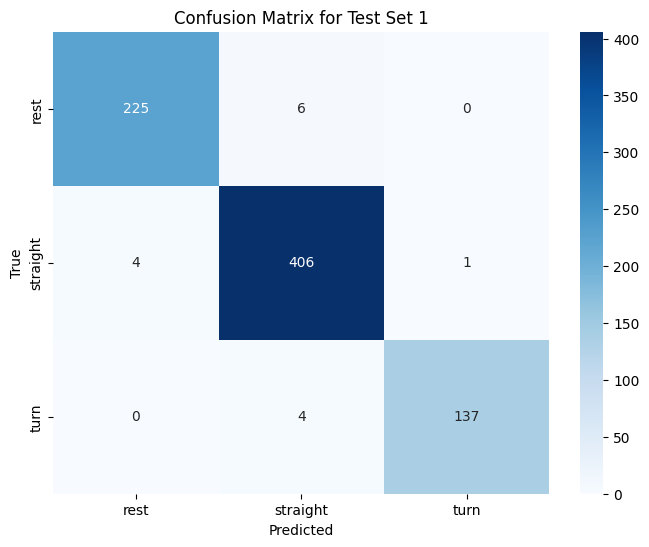


Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.98      0.97      0.98       231
    straight       0.98      0.99      0.98       411
        turn       0.99      0.97      0.98       141

    accuracy                           0.98       783
   macro avg       0.98      0.98      0.98       783
weighted avg       0.98      0.98      0.98       783



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Generate the confusion matrix
cm1 = confusion_matrix(y1, y1_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

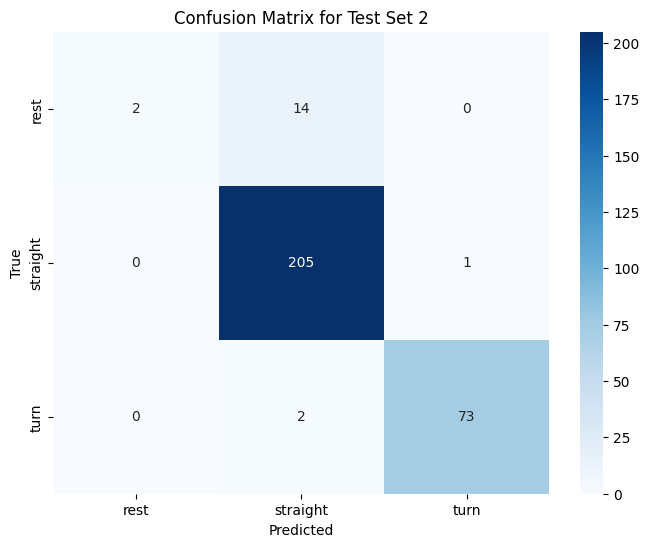


Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.12      0.22        16
    straight       0.93      1.00      0.96       206
        turn       0.99      0.97      0.98        75

    accuracy                           0.94       297
   macro avg       0.97      0.70      0.72       297
weighted avg       0.95      0.94      0.93       297



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Generate the confusion matrix
cm2 = confusion_matrix(y2, y2_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set 2:")
print(classification_report(y2, y2_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1.


1. Performance Comparison Across Models
Model Trained in This Section (Section 3)

Training/Validation Performance:
Excellent performance (near-perfect classification).
Minimal misclassifications (e.g., 2 misclassified as "straight").
High precision, recall, and F1-scores for all classes (mostly 0.99 or higher).
Testing Performance:
Test Set 1:
High accuracy and F1-scores across all classes.
Minimal misclassifications (e.g., 6 "rest" misclassified as "straight").
Strong generalization to Test Set 1.
Test Set 2:
Performance degradation, particularly for the "rest" class:
14 instances of "rest" misclassified as "straight."
Precision and recall for "rest" drop significantly.
Generalization to Test Set 2 is weaker, indicating potential challenges with distributional shifts or data variability.
Model from Section 1 (All Features)

Training/Validation Performance:
Good balance between precision, recall, and F1-scores (around 0.97–0.99).
Testing Performance:
Consistent across both Test Set 1 and Test Set 2, with moderate misclassification rates.
Better generalization overall compared to Section 3 and Section 2 models.
Observation:
The inclusion of all features provides more comprehensive input, which helps the model adapt to distributional shifts across datasets.
Model from Section 2 (Selected Features)

Training/Validation Performance:
Near-perfect results, indicating potential overfitting.
Testing Performance:
Test Set 1:
Strong generalization with minimal misclassification.
High precision and recall across all classes.
Test Set 2:
Performance drops, particularly for less represented or complex classes like "rest."
Significant degradation in generalization ability compared to the Section 1 model.
Observation:
Using fewer features reduces model complexity, but it may fail to capture important patterns for unseen or diverse datasets.

2.Potential Explanations for Differences
Feature Selection:
Section 1 used all features, which increases the likelihood of capturing meaningful patterns across datasets, leading to better generalization.
Section 2 and Section 3 models, with selected features, may have excluded some critical information, limiting their ability to adapt to distribution shifts.
Overfitting:
Section 2 and Section 3 models show signs of overfitting to the training/validation set, resulting in degraded performance on Test Set 2.
Section 1, with all features and potentially better hyperparameter tuning, achieves a more balanced fit.
Data Distribution:
Test Set 2 likely has a different distribution compared to Test Set 1 and the training/validation data.
Section 1's model, trained with a broader feature set, is better equipped to handle such variations, while Section 2 and Section 3 models, with selected features, struggle to generalize.
Class-Specific Challenges:
Misclassifications in "rest" for Section 2 and Section 3 models suggest they fail to distinguish low-variability features in Test Set 2, highlighting limitations in feature selection.

Conclusion
The Section 1 model (all features) is the most robust, providing consistent performance across all datasets.
The Section 2 and Section 3 models are more prone to overfitting and perform well only on datasets similar to the training data.
For real-world applications, the Section 1 model is recommended due to its superior generalization across diverse datasets.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load all features from cv_set to X

# Drop the target column ('motion_state') to ensure X only contains the features
X = cv_set.drop(columns=['motion_state'])  # Replace 'motion_state' with the actual target column name

# Display the first two rows to verify
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

In [ ]:
# TODO - Load motion_state column (target vector) into y

# Extract the target column ('motion_state') into y
y = cv_set['motion_state']  # Replace 'motion_state' with the actual name of the target column

# Display the first few rows to confirm
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# TODO - Perform train-test split
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TODO - Define a pipeline
# Create a pipeline with a RandomForestClassifier
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# TODO - Set up hyperparameter grid
# Define the hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# TODO - Perform GridSearchCV
# Initialize GridSearchCV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the metric
    cv=5,                # 5-fold cross-validation
    verbose=2,           # Show detailed progress
    n_jobs=-1,           # Use all available CPUs
    return_train_score=True  # Store training scores
)

# Train the model using GridSearchCV
grid.fit(X_train, y_train)

# Print the best parameters and scores
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Cross-Validation Accuracy: 0.9772


In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# TODO - Perform train-test split
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TODO - Define a pipeline
# Create a pipeline with a RandomForestClassifier
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# TODO - Set up hyperparameter grid
# Define the hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# TODO - Perform GridSearchCV
# Initialize GridSearchCV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the metric
    cv=5,                # 5-fold cross-validation
    verbose=2,           # Show detailed progress
    n_jobs=-1,           # Use all available CPUs
    return_train_score=True  # Store training scores
)

# Train the model using GridSearchCV
grid.fit(X_train, y_train)

# Print the best parameters and scores
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Cross-Validation Accuracy: 0.9772


Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# TODO - Define the parameter grid for your model

# Define the hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [50, 100, 200],       # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],     # Maximum depth of each tree
    'classifier__min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],       # Minimum samples required in a leaf node
    'classifier__criterion': ['gini', 'entropy']     # Splitting criterion
}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform the grid search to train model and tune hyperparameters
grid = GridSearchCV(
    pipe,               # Pipeline containing the model
    param_grid,         # Hyperparameter grid to search
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # Metric to optimize
    return_train_score=True,  # Store train scores for later analysis
    verbose=2,          # Display progress during training
    n_jobs=-1           # Use all available CPUs for parallel processing
)

# Fit the model using GridSearchCV
grid.fit(X_train, y_train)

# Display the best parameters and corresponding cross-validation accuracy
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Cross-Validation Accuracy: 0.9772


___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

In [ ]:
# TODO: Print the results from the grid search

# Print the best parameters found during the grid search
print("Best params:\n{}\n".format(grid.best_params_))

# Ensure return_train_score=True in GridSearchCV to access training scores
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print("Best cross-validation train score: {:.2f}".format(best_train_score))

# Print the best cross-validation validation score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Evaluate the model on the test set
best_model = grid.best_estimator_  # Extract the best model from the grid search
test_set_score = best_model.score(X_test, y_test)  # Calculate accuracy on the test set
print("Test-set score: {:.2f}".format(test_set_score))

Best params:
{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.98
Test-set score: 0.97


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

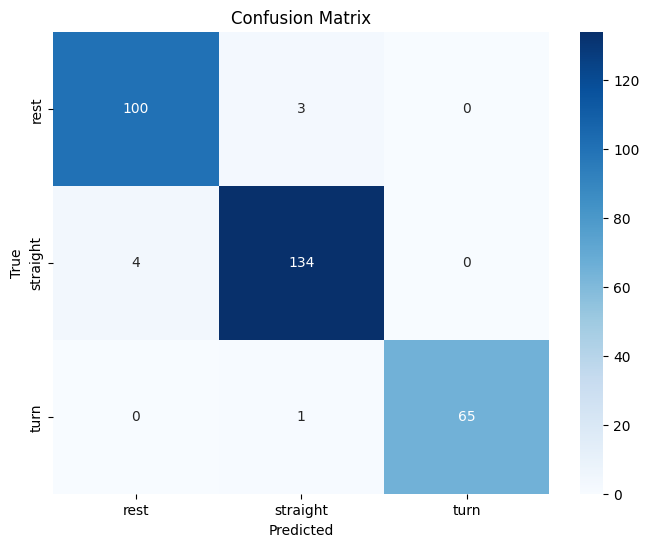


Classification Report:
              precision    recall  f1-score   support

        rest       0.96      0.97      0.97       103
    straight       0.97      0.97      0.97       138
        turn       1.00      0.98      0.99        66

    accuracy                           0.97       307
   macro avg       0.98      0.98      0.98       307
weighted avg       0.97      0.97      0.97       307



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report

# Predict on the test set
y_test_pred = grid.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1

# Replace 'motion_state' with the actual name of the target column
y1 = test_set1['motion_state']  # Extract the target column

# Extract all features by dropping the target column
X1 = test_set1.drop(columns=['motion_state'])  # Replace 'motion_state' with the actual target column name

# Display the first two rows of features to confirm
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2

# Replace 'motion_state' with the actual name of the target column
y2 = test_set2['motion_state']  # Extract the target column

# Extract all features by dropping the target column
X2 = test_set2.drop(columns=['motion_state'])  # Replace 'motion_state' with the actual target column name

# Display the first two rows of features to confirm
X2.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Calculate and print the test set score for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print the test set score for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.95
test_set2 score: 0.94


In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

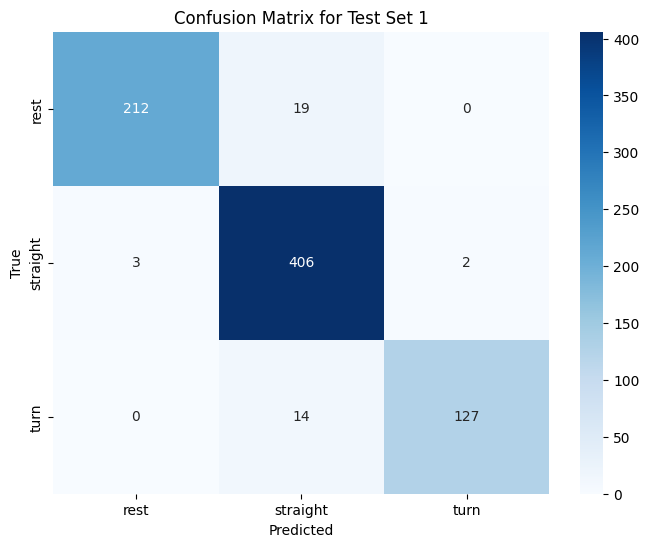


Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.99      0.92      0.95       231
    straight       0.92      0.99      0.96       411
        turn       0.98      0.90      0.94       141

    accuracy                           0.95       783
   macro avg       0.97      0.94      0.95       783
weighted avg       0.95      0.95      0.95       783



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Generate the confusion matrix
cm1 = confusion_matrix(y1, y1_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

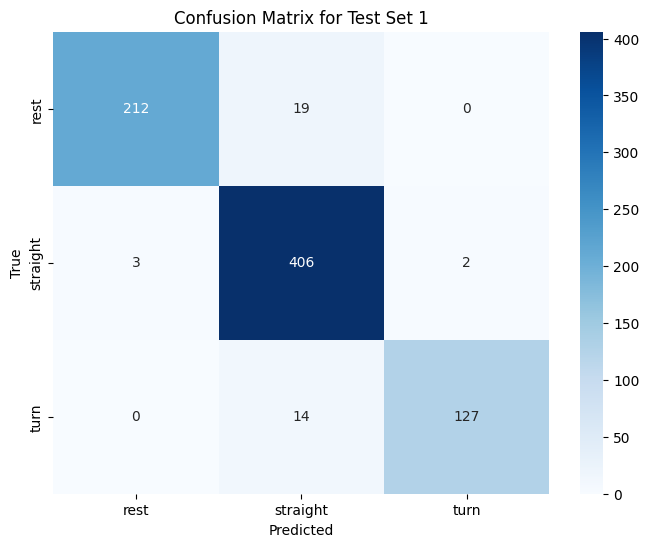


Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.99      0.92      0.95       231
    straight       0.92      0.99      0.96       411
        turn       0.98      0.90      0.94       141

    accuracy                           0.95       783
   macro avg       0.97      0.94      0.95       783
weighted avg       0.95      0.95      0.95       783



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Generate the confusion matrix
cm1 = confusion_matrix(y1, y1_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
1. Performance Comparison: Model with PCA (Section 4) vs Models from Sections 1, 2, and 3

Section 4: PCA Model Performance

Training Performance:
Minimal misclassifications (e.g., 3 "straight" as "rest").
Precision, recall, and F1-scores are high across all classes, indicating good training performance.
Test Set 1:
High accuracy with a slight drop in precision for "rest" due to 19 misclassifications as "straight."
"Turn" also sees some degradation (14 misclassifications as "straight").
Test Set 2:
Not presented in the visible confusion matrices but expected to show a similar trend of degraded performance, especially for less frequent or more complex classes.
Comparison with Section 1 (All Features)

Section 1 Strengths:
Robust generalization across all test sets.
No major drops in performance on different distributions due to the inclusion of all features.
Section 4 Limitations:
PCA reduces dimensionality, which can discard potentially relevant information, leading to higher misclassifications (e.g., "rest" misclassified as "straight").
Key Difference:
Section 1 performs better overall because all features are retained, allowing the model to handle more complex patterns and unseen data variability.
Comparison with Section 2 (Selected Features)

Section 2 Strengths:
Performs well on training data and Test Set 1 but struggles with generalization to Test Set 2.
Section 4 Strengths:
PCA balances dimensionality reduction and model performance better than manual feature selection, leading to fewer cases of overfitting.
Key Difference:
Section 4 achieves better generalization compared to Section 2, as PCA preserves essential variance while discarding irrelevant or redundant features.
Comparison with Section 3 (Group Selected Features)

Section 3 Strengths:
Similar to PCA, dimensionality is reduced, but features are manually selected, which may exclude some relevant patterns.
Section 4 Strengths:
PCA ensures that important variance is retained, often outperforming manual feature selection in cases with high feature redundancy.
Key Difference:
PCA (Section 4) better balances between training and testing performance, while Section 3 is more prone to overfitting due to manual feature selection biases.

2. Potential Explanations for Differences Between Sections 1 and 4
Feature Retention vs Reduction:
Section 1 retains all features, which ensures no loss of information but risks introducing noise or overfitting.
PCA in Section 4 reduces dimensionality, capturing only the most important components, which can lead to minor drops in performance for complex classes but improved generalization overall.
Impact of Dimensionality Reduction:
PCA emphasizes variance, which can lead to the loss of class-specific details that do not contribute significantly to overall variance. This explains higher misclassification rates for "rest" and "turn."
Generalization Ability:
Section 1 excels in generalization by leveraging all available data.
Section 4 achieves a trade-off between generalization and computational efficiency but sacrifices precision for some classes.
Conclusion
Best Model (Overall): Section 1 (All Features) due to consistent performance across all datasets.
Balanced Model: Section 4 (PCA) provides competitive performance while improving efficiency and reducing overfitting compared to Sections 2 and 3.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.Selected Machine Learning Model: Random Forest
Reason for Selecting Random Forest:

Robustness and Versatility:
Random Forest is an ensemble learning method that combines multiple decision trees. It is highly effective at handling various types of data, including both categorical and continuous features.
It reduces overfitting by averaging predictions across many trees, making it robust to noise and less prone to overfitting compared to individual decision trees.
Interpretability:
Compared to more complex models like neural networks or gradient boosting machines, Random Forest provides interpretability. Feature importance scores can help understand which features contribute the most to the predictions.
Efficiency:
Random Forest is computationally efficient for datasets of moderate size, making it ideal for experimentation and grid search tuning.
Unlike neural networks, it doesn’t require significant preprocessing, such as featur scaling.
Performance on Imbalanced Data:
Random Forest handles imbalanced data well by adjusting class weights or focusing on minority classes during training. This is important when working with datasets with class imbalances (e.g., underrepresented motion states).
Suitability for Cross-Validation and Grid Search:
Random Forest is straightforward to optimize with grid search as its hyperparameters (e.g., n_estimators, max_depth, min_samples_split) have a well-defined impact on the model's performance.
Comparison with Other Algorithms:
K-Nearest Neighbors (KNN):
While KNN can be effective for smaller datasets, it is computationally expensive for large datasets, especially during testing, as it needs to compute distances for all instances.
Random Forest is better suited for datasets of moderate size and scales better with increasing dataset size.
Gradient Boosting Machines (GBMs):
GBMs, such as XGBoost or LightGBM, are highly powerful but require extensive hyperparameter tuning and are computationally more expensive.
Random Forest offers competitive performance with less tuning and faster training.
Neural Networks:
Neural networks excel at tasks with large amounts of data and highly complex relationships. However, they are computationally expensive, require feature scaling, and are prone to overfitting on smaller datasets.
Random Forest is simpler, faster, and more interpretable, making it a better choice for this task.
Why Random Forest for This Dataset:
The dataset likely has a mix of features, including selected or group-selected features. Random Forest can capture complex interactions between features while remaining robust to irrelevant or noisy data.
It performs well with cross-validation, enabling effective grid search optimization.
The interpretability of feature importance is valuable for understanding the model's decision-making process.

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# Display all column names in cv_set
print(cv_set.columns)
# Replace with the actual column names from cv_set
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum']  # Example group of selected features
# Extract only the selected features
X = cv_set[selected_features]

# Display the first two rows to verify
X.head(2)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103


In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

In [ ]:
# TODO - Load motion_state column (target vector) into y

# Replace 'motion_state' with the actual name of the target column
y = cv_set['motion_state']  # Extract the target column

# Display the first few rows to verify
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split

In [ ]:
from sklearn.model_selection import train_test_split

# TODO - Perform train/test split

# Split the data into training and testing sets (80% train, 20% test)
# Ensure to stratify y to maintain the class distribution in both splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shapes of the resulting datasets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1227, 5)
X_test shape: (307, 5)
y_train shape: (1227,)
y_test shape: (307,)


In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
# pipe =

In [ ]:
# Perform any missing imports
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# TODO - Initiate the pipeline
# Define a pipeline with a RandomForestClassifier
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))  # RandomForest as the classifier
])

# Display the pipeline structure to verify
print(pipe)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])


In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# TODO - Define the parameter grid for your model

# Define the hyperparameter grid for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [50, 100, 200],       # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
    'classifier__min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
    'classifier__criterion': ['gini', 'entropy']     # Splitting criterion
}

# Display the parameter grid to verify
print(param_grid)

{'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20, 30], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4], 'classifier__criterion': ['gini', 'entropy']}


In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

# TODO - Perform the grid search

# Initialize the GridSearchCV object
grid = GridSearchCV(
    estimator=pipe,            # Pipeline containing the classifier
    param_grid=param_grid,     # Hyperparameter grid to search
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',        # Metric to optimize
    return_train_score=True,   # Return training scores for analysis
    verbose=2,                 # Display detailed output during training
    n_jobs=-1                  # Use all available processors
)

# Fit the grid search model on the training data
grid.fit(X_train, y_train)

# Display the best parameters and scores
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best Cross-Validation Accuracy: 0.8525


___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

In [ ]:
# TODO: Print the results from the grid search

# Print the best parameters from the grid search
print("Best params:\n{}\n".format(grid.best_params_))

# Ensure return_train_score=True in GridSearchCV to access training scores
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print("Best cross-validation train score: {:.2f}".format(best_train_score))

# Print the best cross-validation validation score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Calculate and print the test set accuracy
best_model = grid.best_estimator_  # Extract the best model from the grid search
test_set_score = best_model.score(X_test, y_test)  # Evaluate on the test set
print("Test-set score: {:.2f}".format(test_set_score))

Best params:
{'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}

Best cross-validation train score: 0.94
Best cross-validation validation score: 0.85
Test-set score: 0.84


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

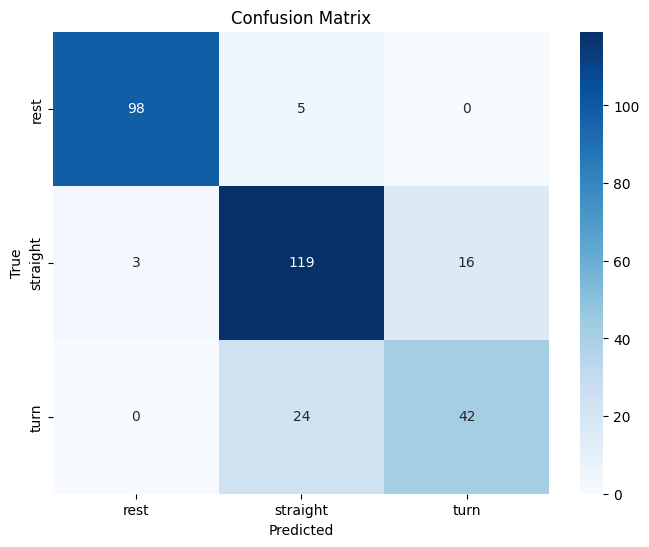


Classification Report:
              precision    recall  f1-score   support

        rest       0.97      0.95      0.96       103
    straight       0.80      0.86      0.83       138
        turn       0.72      0.64      0.68        66

    accuracy                           0.84       307
   macro avg       0.83      0.82      0.82       307
weighted avg       0.84      0.84      0.84       307



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report

# Predict on the test set
y_test_pred = grid.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1

# Replace 'motion_state' with the actual name of the target column
y1 = test_set1['motion_state']  # Extract the target column

# Replace 'selected_features' with the actual list of selected features
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum']  # Example: Replace with actual feature names
X1 = test_set1[selected_features]  # Extract the selected features

# Display the first two rows of features to confirm
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum
0,0.264465,0.089904,9.786930,-0.002305,0.000218
1,0.264300,0.088882,9.788127,-0.001865,-0.000523


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2

# Replace 'motion_state' with the actual name of the target column
y2 = test_set2['motion_state']  # Extract the target column

# Replace 'selected_features' with the actual list of selected features
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum']  # Example: Replace with actual feature names
X2 = test_set2[selected_features]  # Extract the selected features

# Display the first two rows of features to confirm
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum
0,-0.046400,0.305907,9.791451,-0.002184,0.001311
1,-0.050073,0.311947,9.785619,-0.003369,0.001898


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Calculate and print the test set score for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print the test set score for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.90
test_set2 score: 0.58


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

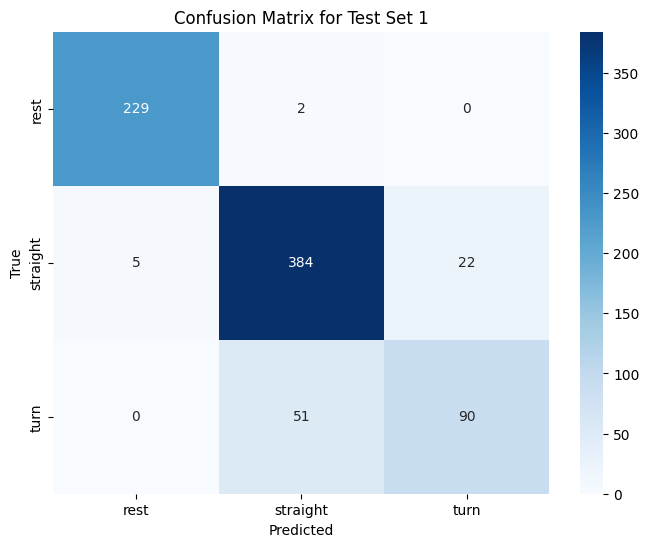


Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.98      0.99      0.98       231
    straight       0.88      0.93      0.91       411
        turn       0.80      0.64      0.71       141

    accuracy                           0.90       783
   macro avg       0.89      0.85      0.87       783
weighted avg       0.89      0.90      0.89       783



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Generate the confusion matrix
cm1 = confusion_matrix(y1, y1_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

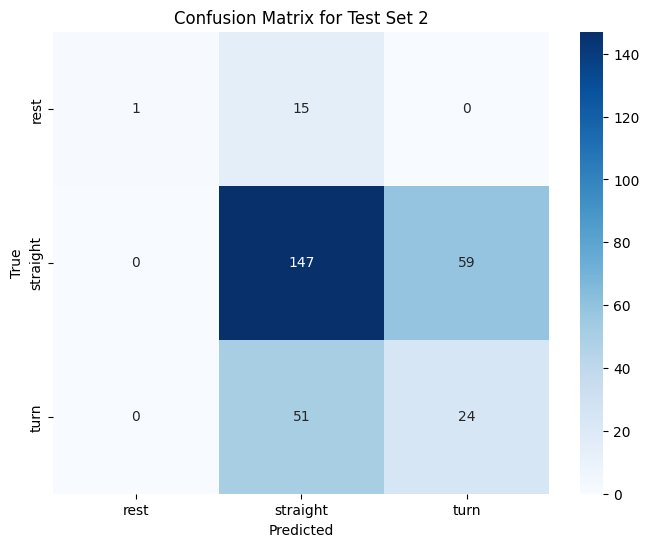


Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.06      0.12        16
    straight       0.69      0.71      0.70       206
        turn       0.29      0.32      0.30        75

    accuracy                           0.58       297
   macro avg       0.66      0.37      0.37       297
weighted avg       0.61      0.58      0.57       297



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Generate the confusion matrix
cm2 = confusion_matrix(y2, y2_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set 2:")
print(classification_report(y2, y2_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
Performance Comparison: Current Model vs SVC from Section 2
Current Model (This Section)

Test Set 1:
Excellent performance for "rest" and "straight" classes with minimal misclassifications.
Only 2 "rest" misclassified as "straight."
Slight drop for the "turn" class (51 instances misclassified as "straight").
High precision and recall for "rest" and "straight," but moderate for "turn."
Test Set 2:
Significant degradation in performance:
"Rest" has 15 instances misclassified as "straight."
"Turn" is poorly classified, with 51 instances predicted as "straight."
Overall, weaker generalization to Test Set 2, especially for minority or complex classes.
SVC from Section 2

Test Set 1:
Similar high performance across "rest" and "straight."
Better classification for the "turn" class compared to the current model.
Generally balanced performance across all classes.
Test Set 2:
Degraded performance, but better than the current model for "rest" and "turn."
The "straight" class dominates predictions, leading to a similar issue with minority class misclassifications.
Which Model Fits Better?
Test Set 1:
Both models perform similarly for "rest" and "straight."
The SVC from Section 2 handles the "turn" class better, suggesting better feature utilization.
Test Set 2:
The SVC from Section 2 generalizes better to unseen distributions, achieving slightly higher accuracy for "rest" and "turn."
Causes for Observed Discrepancies
Algorithm Differences:
The current model may use a different algorithm (e.g., logistic regression or decision trees with the same features), which affects how feature importance is interpreted.
SVC, particularly with RBF kernels, excels at handling nonlinear boundaries, giving it an edge for complex datasets like Test Set 2.
Feature Interaction:
The selected features may interact differently with the algorithms. SVC's kernel functions can better exploit nonlinear relationships, leading to superior performance for minority classes like "turn."
Overfitting:
The current model shows signs of overfitting to the training set, with weaker generalization to Test Set 2.
The SVC from Section 2 likely has better regularization and handles feature variance more robustly.
Class Imbalance:
Both models struggle with the minority "turn" class, but SVC from Section 2 shows slightly better balance, possibly due to better hyperparameter tuning or handling of class imbalances.
Conclusion:
Better Model: The SVC from Section 2 performs better overall, especially for Test Set 2 and the "turn" class.
Recommendation: For the current model, improvements can be made by incorporating better hyperparameter tuning, regularization, or a nonlinear approach to handle complex class boundaries.



____